# Telecom churn Case Study

## Problem Statement

#### The case study aims to build a predictive model to help reduce customer churn of telecom companies by predicting which customers are at high risk of churn.

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
It is required to analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

#### Understanding and defining churn

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services) 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.
However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

#### Definitions of churn

There are various ways to define churn, such as:

- Revenue-based churn: 
Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. We could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue. The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

- Usage-based churn: 
Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if we define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

- High-value churn: 
In the Indian and Southeast Asian markets, approximately 80% of revenue comes from the top 20% of customers (called high-value customers). Thus, if we can reduce the churn of high-value customers, we will be able to reduce significant revenue leakage.

#### Business Goal:
To predict the churn in the last month using the data (features) from the first three months. 
The dataset containing customer-level information for a span of four consecutive months - June, July, August and September is available

In [1]:
#importing the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_classification

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

import math
import statsmodels.api as stm
import xgboost as xgb

### Step 1 : Data understanding and exploration

In [3]:
# Reading the data from csv file 'telecom_churn_data.csv' in 'churn'
churn=pd.read_csv('telecom_churn_data.csv')

In [4]:
## Printing the dataframe head
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
## Understanding overall entries and their data type
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [6]:
## Finding out number of rows and columns
churn.shape

(99999, 226)

In [7]:
## Understanding the summary statistics of numerical columns
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [8]:
## Finding out the columns
churn.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [9]:
## To display all the rows and columns when a code is executed
pd.options.display. max_columns = None
pd.options.display. max_rows = None

In [10]:
# Checking for the missing values in the dataset
churn.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [11]:
# Finding the null percentages across columns
round(churn.isnull().sum().sort_values(ascending=False)/len(churn.index),2)*100

arpu_3g_6                   75.0
night_pck_user_6            75.0
total_rech_data_6           75.0
arpu_2g_6                   75.0
max_rech_data_6             75.0
fb_user_6                   75.0
av_rech_amt_data_6          75.0
date_of_last_rech_data_6    75.0
count_rech_2g_6             75.0
count_rech_3g_6             75.0
date_of_last_rech_data_7    74.0
total_rech_data_7           74.0
fb_user_7                   74.0
max_rech_data_7             74.0
night_pck_user_7            74.0
count_rech_2g_7             74.0
av_rech_amt_data_7          74.0
arpu_2g_7                   74.0
count_rech_3g_7             74.0
arpu_3g_7                   74.0
total_rech_data_9           74.0
count_rech_3g_9             74.0
fb_user_9                   74.0
max_rech_data_9             74.0
arpu_3g_9                   74.0
date_of_last_rech_data_9    74.0
night_pck_user_9            74.0
arpu_2g_9                   74.0
count_rech_2g_9             74.0
av_rech_amt_data_9          74.0
total_rech

In [12]:
# Checking for any duplicate records using mobile number which is a unique identifier
churn['mobile_number'].value_counts().sum()

99999

##### Inference:
- There are total 99999 rows and 226 columns in the dataset
- There are missing values in the dataset, with few columns having >70% of null values. They need to be treated
- Datatypes of the column : 179 float64, 35 int64, 12 object (214 Numeric and 12 categorical columns)
- The variables circle_id, loc_og_t2o_mou,std_og_t2o_mou and loc_ic_t2o_mou have same minimum and maximum value with 0 standard deviation. This implies that they have a single unique value and hence such columns can be dropped
- There are no duplicate records as the number of rows are same when cross verified through mobile number (unique identifier)

### Step 2 : Data cleaning

In [13]:
# For ease of analysis, separating the columns by data types as follows:

# ID columns separation : There are only 2 ID columns here
id_col = ["mobile_number","circle_id"]
print(f"Total ID columns:{len(id_col)}")

# Categorcial columns separation : categorical columns are only date here
date_col = [col for col in churn.columns if churn[col].dtype =="object"]
id_col = ["mobile_number","circle_id"]
print(f"Total Categorical columns:{len(date_col)}")

# Numeric columns separation
numeric_col = [col for col in churn.columns if col not in date_col + id_col]  
print(f"Total Numeric columns:{len(numeric_col)}")

Total ID columns:2
Total Categorical columns:12
Total Numeric columns:212


In [14]:
#Checking the date columns
churn[date_col].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


##### Dropping the columns not required for analysis

In [15]:
# Following columns have only one value, i.e., last day of corresponding month. Hence we can drop them
# "last_date_of_month_6", "last_date_of_month_7", "last_date_of_month_8", "last_date_of_month_9"

# Also, date of Last recharge of corresponding month can be dropped, as we will not get useful insights from them
churn.drop(columns=date_col,inplace=True)

In [16]:
# Dropping ID columns as well as they will not contribute anything for analysis

churn.drop(columns=id_col,inplace=True)

##### Missing value treatment and Initial data analysis

In [17]:
# Checking the Null values column wise
(churn.isnull().sum()/len(churn)).sort_values(ascending = False)

max_rech_data_6       0.748467
total_rech_data_6     0.748467
count_rech_2g_6       0.748467
fb_user_6             0.748467
count_rech_3g_6       0.748467
av_rech_amt_data_6    0.748467
arpu_3g_6             0.748467
arpu_2g_6             0.748467
night_pck_user_6      0.748467
max_rech_data_7       0.744287
total_rech_data_7     0.744287
count_rech_2g_7       0.744287
count_rech_3g_7       0.744287
av_rech_amt_data_7    0.744287
arpu_3g_7             0.744287
arpu_2g_7             0.744287
night_pck_user_7      0.744287
fb_user_7             0.744287
arpu_2g_9             0.740777
count_rech_2g_9       0.740777
total_rech_data_9     0.740777
fb_user_9             0.740777
arpu_3g_9             0.740777
av_rech_amt_data_9    0.740777
max_rech_data_9       0.740777
night_pck_user_9      0.740777
count_rech_3g_9       0.740777
night_pck_user_8      0.736607
arpu_2g_8             0.736607
av_rech_amt_data_8    0.736607
count_rech_3g_8       0.736607
arpu_3g_8             0.736607
count_re

In [18]:
# If the customer do not recharge, the value assigned is NaN. 
# It is not recommended to drop them without analysis and hence imputing them with zero

# Also, when customer did not recharge,the total_rech_data_* and date_of_last_rech_data_* are null. 
# Since this null cannot be dropped out, we will impute them also with zero

imp_zero =  ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

churn[imp_zero] = churn[imp_zero].apply(lambda x: x.fillna(0))

In [19]:
# Columns imputed with zeros are:
# Total Recharge data in month 6,7,8,9, Maximum Recharge Data in Month 6,7,8 ,9, Average Amount recharge Data in Month 6,7,8,9,

In [20]:
# Checking the Null value percentages again
(churn.isnull().sum()/len(churn)).sort_values(ascending = False)

count_rech_2g_6       0.748467
night_pck_user_6      0.748467
fb_user_6             0.748467
arpu_2g_6             0.748467
arpu_3g_6             0.748467
count_rech_3g_6       0.748467
count_rech_2g_7       0.744287
count_rech_3g_7       0.744287
night_pck_user_7      0.744287
arpu_3g_7             0.744287
arpu_2g_7             0.744287
fb_user_7             0.744287
night_pck_user_9      0.740777
arpu_3g_9             0.740777
count_rech_3g_9       0.740777
fb_user_9             0.740777
arpu_2g_9             0.740777
count_rech_2g_9       0.740777
arpu_3g_8             0.736607
arpu_2g_8             0.736607
night_pck_user_8      0.736607
count_rech_2g_8       0.736607
fb_user_8             0.736607
count_rech_3g_8       0.736607
std_og_mou_9          0.077451
std_og_t2c_mou_9      0.077451
loc_ic_t2t_mou_9      0.077451
isd_og_mou_9          0.077451
std_og_t2f_mou_9      0.077451
og_others_9           0.077451
std_ic_t2t_mou_9      0.077451
loc_ic_t2m_mou_9      0.077451
loc_ic_t

In [21]:
# Night pack user columns and FB User columns are categorical column.
# Checking night_pck_user unique values 
for unq in ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9"]:
    print(f"Unique values in {unq}: {churn[unq].unique()}")

Unique values in night_pck_user_6: [ 0. nan  1.]
Unique values in night_pck_user_7: [ 0. nan  1.]
Unique values in night_pck_user_8: [ 0. nan  1.]
Unique values in night_pck_user_9: [nan  0.  1.]


In [22]:
# Checking percentage null values of these columns
cat_col = ["night_pck_user_6","night_pck_user_7","night_pck_user_8","night_pck_user_9","fb_user_6",          
           "fb_user_7","fb_user_8","fb_user_9"]

churn[cat_col].isna().sum()/len(churn)

night_pck_user_6    0.748467
night_pck_user_7    0.744287
night_pck_user_8    0.736607
night_pck_user_9    0.740777
fb_user_6           0.748467
fb_user_7           0.744287
fb_user_8           0.736607
fb_user_9           0.740777
dtype: float64

In [23]:
# Filling NaN value as -1 to mark missing value
churn[cat_col] = churn[cat_col].fillna(-1)

In [24]:
# Checking for the missing value imputation with -1
churn[cat_col].isna().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

In [25]:
# Checking the Null value percentages again
(churn.isnull().sum()/len(churn)).sort_values(ascending = False)

arpu_3g_6             0.748467
count_rech_3g_6       0.748467
count_rech_2g_6       0.748467
arpu_2g_6             0.748467
arpu_3g_7             0.744287
count_rech_3g_7       0.744287
count_rech_2g_7       0.744287
arpu_2g_7             0.744287
count_rech_3g_9       0.740777
arpu_3g_9             0.740777
arpu_2g_9             0.740777
count_rech_2g_9       0.740777
count_rech_2g_8       0.736607
count_rech_3g_8       0.736607
arpu_2g_8             0.736607
arpu_3g_8             0.736607
std_og_t2t_mou_9      0.077451
std_og_t2m_mou_9      0.077451
std_og_t2f_mou_9      0.077451
std_og_t2c_mou_9      0.077451
std_og_mou_9          0.077451
spl_og_mou_9          0.077451
og_others_9           0.077451
std_ic_t2t_mou_9      0.077451
loc_ic_t2t_mou_9      0.077451
loc_ic_t2m_mou_9      0.077451
loc_ic_t2f_mou_9      0.077451
loc_ic_mou_9          0.077451
loc_og_t2c_mou_9      0.077451
std_ic_t2m_mou_9      0.077451
std_ic_t2o_mou_9      0.077451
std_ic_mou_9          0.077451
spl_ic_m

In [26]:
# Many columns have missing values as high as 70% amd above. 
# Dropping the columns with missing values >50%
churn = churn.drop(churn.loc[:, list(round(100 * (churn.isnull().sum() / len(churn.index)), 2) > 50)].columns, axis=1)

In [27]:
# Checking the Null value percentages after dropping columns with missing values >50%
(churn.isnull().sum()/len(churn)).sort_values(ascending = False)

std_ic_t2t_mou_9      0.077451
loc_og_t2t_mou_9      0.077451
loc_og_t2f_mou_9      0.077451
loc_og_t2c_mou_9      0.077451
loc_og_mou_9          0.077451
std_og_t2t_mou_9      0.077451
std_og_t2m_mou_9      0.077451
std_og_t2f_mou_9      0.077451
std_og_mou_9          0.077451
isd_og_mou_9          0.077451
spl_og_mou_9          0.077451
og_others_9           0.077451
spl_ic_mou_9          0.077451
loc_ic_t2t_mou_9      0.077451
loc_ic_t2m_mou_9      0.077451
loc_ic_t2f_mou_9      0.077451
loc_ic_mou_9          0.077451
std_ic_t2m_mou_9      0.077451
std_ic_t2f_mou_9      0.077451
std_ic_t2o_mou_9      0.077451
std_ic_mou_9          0.077451
loc_og_t2m_mou_9      0.077451
std_og_t2c_mou_9      0.077451
roam_og_mou_9         0.077451
ic_others_9           0.077451
onnet_mou_9           0.077451
roam_ic_mou_9         0.077451
isd_ic_mou_9          0.077451
offnet_mou_9          0.077451
spl_og_mou_8          0.053781
std_og_t2c_mou_8      0.053781
og_others_8           0.053781
std_og_t

In [28]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 196 entries, loc_og_t2o_mou to sep_vbc_3g
dtypes: float64(163), int64(33)
memory usage: 149.5 MB


In [29]:
# Checking columns which have only 1 value.

unq_value_col = pd.DataFrame(churn.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(unq_value_col[unq_value_col['nunique'] == 1])

              feature  nunique
0      loc_og_t2o_mou        1
1      std_og_t2o_mou        1
2      loc_ic_t2o_mou        1
55   std_og_t2c_mou_6        1
56   std_og_t2c_mou_7        1
57   std_og_t2c_mou_8        1
58   std_og_t2c_mou_9        1
107  std_ic_t2o_mou_6        1
108  std_ic_t2o_mou_7        1
109  std_ic_t2o_mou_8        1
110  std_ic_t2o_mou_9        1


In [30]:
# Since the above columns have just one Unique value, they can be dropped as they will have zero variance

col_to_drop = list(unq_value_col[unq_value_col['nunique'] == 1]["feature"])
churn.drop(columns=col_to_drop,inplace=True)

In [31]:
# Checking the Null value percentages 
(churn.isnull().sum()/len(churn)).sort_values(ascending = False)

loc_ic_mou_9          0.077451
loc_og_mou_9          0.077451
std_ic_t2t_mou_9      0.077451
loc_og_t2m_mou_9      0.077451
loc_ic_t2t_mou_9      0.077451
spl_ic_mou_9          0.077451
std_ic_t2f_mou_9      0.077451
loc_og_t2f_mou_9      0.077451
loc_og_t2c_mou_9      0.077451
std_ic_t2m_mou_9      0.077451
loc_ic_t2m_mou_9      0.077451
std_og_t2t_mou_9      0.077451
og_others_9           0.077451
std_ic_mou_9          0.077451
std_og_t2m_mou_9      0.077451
std_og_t2f_mou_9      0.077451
std_og_mou_9          0.077451
spl_og_mou_9          0.077451
loc_og_t2t_mou_9      0.077451
isd_og_mou_9          0.077451
roam_og_mou_9         0.077451
roam_ic_mou_9         0.077451
loc_ic_t2f_mou_9      0.077451
onnet_mou_9           0.077451
offnet_mou_9          0.077451
isd_ic_mou_9          0.077451
ic_others_9           0.077451
std_og_mou_8          0.053781
std_ic_t2f_mou_8      0.053781
ic_others_8           0.053781
loc_ic_mou_8          0.053781
loc_ic_t2m_mou_8      0.053781
std_og_t

In [32]:
# Although we have null values in many columns, the proportion of it is very less
# Hence, we will impute them with zero instead of iteratively imputing as these values are not available as well
churn= churn.fillna(0)

In [33]:
# Checking the Null value percentages again
(churn.isnull().sum()/len(churn)).sort_values(ascending = False)

arpu_6                0.0
total_rech_amt_9      0.0
ic_others_8           0.0
ic_others_9           0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
std_ic_t2m_mou_7      0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
last_day_rch_amt_9    0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
ic_others_7           0.0
ic_others_6           0.0
isd_ic_mou_9          0.0
isd_ic_mou_8          0.0
std_ic_t2m_mou_9      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_8      0.0
std_ic_t2f_mou_9      0.0
std_ic_mou_6          0.0
std_ic_mou_7          0.0
std_ic_mou_8          0.0
std_ic_mou_9          0.0
total_ic_mou_6        0.0
total_ic_mou_7        0.0
total_ic_mou_8        0.0
total_ic_mou

In [34]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 185 entries, arpu_6 to sep_vbc_3g
dtypes: float64(152), int64(33)
memory usage: 141.1 MB


In [35]:
# All the null values are removed and we still have 99999 rows of data and 185 columns

##### Filtering High Value Customer

Since we need to predict churn only for the high-value customers, we will define high-value customers as:

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [36]:
# Calculating total Data recharge amount as : Total Data Recharge * Average Amount of Data recharge
churn["total_data_recharge_amnt_6"] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn["total_data_recharge_amnt_7"] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

In [37]:
# Calculating Total Amount recharge as : total talktime recharge + total data recharge
churn["total_recharge_amnt_6"] = churn.total_rech_amt_6 + churn.total_data_recharge_amnt_6
churn["total_recharge_amnt_7"] = churn.total_rech_amt_7 + churn.total_data_recharge_amnt_7

In [38]:
# Calculating Average amount of recharge of 6th and 7th month
churn['average_amnt_6_7'] = (churn["total_recharge_amnt_6"] + churn["total_recharge_amnt_7"])/2

In [39]:
# Checking for 70th percentile of "average_amnt_6_7"
churn['average_amnt_6_7'].quantile(.70)

478.0

In [40]:
# 70th percentile of average amount recharge in 6th and 7th month is 478.0. The data to be filtered based on this value
highvalue_cust = churn[churn["average_amnt_6_7"]>= churn["average_amnt_6_7"].quantile(.70)]

In [41]:
# Deleting variables created to filter high-value customers
highvalue_cust.drop(columns=["total_data_recharge_amnt_6","total_data_recharge_amnt_7","total_recharge_amnt_6",\
                                "total_recharge_amnt_7","average_amnt_6_7"],inplace=True)

In [42]:
highvalue_cust.shape

(30001, 185)

##### We have 30001 rows of high value customers with 185 columns

##### Tagging churners and removing attributes of the churn phase

We need to tag the churned customers (churn=1, else 0) based on the fourth month.
The churned customers are defined as those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 
The attributes to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [43]:
# Calculating total call in mins by adding Incoming and Outgoing calls
highvalue_cust['total_calls_9'] = highvalue_cust.total_ic_mou_9 + highvalue_cust.total_og_mou_9

In [44]:
# Calculating total 2G and 3G consumption of data
highvalue_cust["total_data_consumptions"] = highvalue_cust.vol_2g_mb_9 + highvalue_cust.vol_3g_mb_9

##### To calculate churn variable, churn customers are tagged as the one who have not made any calls/have not consumed any data on 9th month
Churn customer is marked as 1 & Non-churn custoner is marked as 0

In [45]:
highvalue_cust["churn"]=highvalue_cust.apply(lambda row:1 if (row.total_calls_9==0 and row.total_data_consumptions==0) else 0,axis=1)

In [46]:
# Checking the percentages of churn and non churn data
highvalue_cust["churn"].value_counts(normalize=True)

churn
0    0.918636
1    0.081364
Name: proportion, dtype: float64

##### As the churn percentage is close to 8% and non-churners are approx 92%, the data is imbalanced

In [47]:
# Dropping the derived columns
highvalue_cust.drop(columns=["total_calls_9","total_data_consumptions"],inplace=True)

We need to delete columns belong to the 9th month -> Churn Month
i.e., after tagging churners, need to remove all the attributes corresponding to the churn phase as these columns contain data for users, where these users are already churned.
Hence they will not contribute anything to churn prediction.

In [48]:
# Dropping all 9th month columns
highvalue_cust = highvalue_cust.filter(regex='[^9]$',axis=1)

In [49]:
highvalue_cust.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 30001 entries, 0 to 99997
Data columns (total 141 columns):
 #    Column              Dtype  
---   ------              -----  
 0    arpu_6              float64
 1    arpu_7              float64
 2    arpu_8              float64
 3    onnet_mou_6         float64
 4    onnet_mou_7         float64
 5    onnet_mou_8         float64
 6    offnet_mou_6        float64
 7    offnet_mou_7        float64
 8    offnet_mou_8        float64
 9    roam_ic_mou_6       float64
 10   roam_ic_mou_7       float64
 11   roam_ic_mou_8       float64
 12   roam_og_mou_6       float64
 13   roam_og_mou_7       float64
 14   roam_og_mou_8       float64
 15   loc_og_t2t_mou_6    float64
 16   loc_og_t2t_mou_7    float64
 17   loc_og_t2t_mou_8    float64
 18   loc_og_t2m_mou_6    float64
 19   loc_og_t2m_mou_7    float64
 20   loc_og_t2m_mou_8    float64
 21   loc_og_t2f_mou_6    float64
 22   loc_og_t2f_mou_7    float64
 23   loc_og_t2f_mou_8    float64
 24   loc_o

### Step 3: Exploratory Data Analysis

In [50]:
# Checking the percenatges of churn and non-churn customers
highvalue_cust["churn"].value_counts(normalize=True)

churn
0    0.918636
1    0.081364
Name: proportion, dtype: float64

In [51]:
highvalue_cust.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957,260.793024,267.819295,234.112539,373.693961,378.103169,335.077044,16.110355,12.642504,

##### Deriving new features by comparing 8th month features vs average of 7th and 6th month features

In [52]:
# Comparing average revenue and calculating the difference
highvalue_cust['arpu_diff'] = highvalue_cust.arpu_8 - ((highvalue_cust.arpu_6 + highvalue_cust.arpu_7)/2)

# Checking various columns related to minutes of usage and calculating difference
highvalue_cust['onnet_mou_diff'] = highvalue_cust.onnet_mou_8 - ((highvalue_cust.onnet_mou_6 + highvalue_cust.onnet_mou_7)/2)
highvalue_cust['offnet_mou_diff'] = highvalue_cust.offnet_mou_8 - ((highvalue_cust.offnet_mou_6 + highvalue_cust.offnet_mou_7)/2)
highvalue_cust['roam_ic_mou_diff'] = highvalue_cust.roam_ic_mou_8 - ((highvalue_cust.roam_ic_mou_6 + highvalue_cust.roam_ic_mou_7)/2)
highvalue_cust['roam_og_mou_diff'] = highvalue_cust.roam_og_mou_8 - ((highvalue_cust.roam_og_mou_6 + highvalue_cust.roam_og_mou_7)/2)
highvalue_cust['loc_og_mou_diff'] = highvalue_cust.loc_og_mou_8 - ((highvalue_cust.loc_og_mou_6 + highvalue_cust.loc_og_mou_7)/2)
highvalue_cust['std_og_mou_diff'] = highvalue_cust.std_og_mou_8 - ((highvalue_cust.std_og_mou_6 + highvalue_cust.std_og_mou_7)/2)
highvalue_cust['isd_og_mou_diff'] = highvalue_cust.isd_og_mou_8 - ((highvalue_cust.isd_og_mou_6 + highvalue_cust.isd_og_mou_7)/2)
highvalue_cust['spl_og_mou_diff'] = highvalue_cust.spl_og_mou_8 - ((highvalue_cust.spl_og_mou_6 + highvalue_cust.spl_og_mou_7)/2)
highvalue_cust['total_og_mou_diff'] = highvalue_cust.total_og_mou_8 - ((highvalue_cust.total_og_mou_6 + highvalue_cust.total_og_mou_7)/2)
highvalue_cust['loc_ic_mou_diff'] = highvalue_cust.loc_ic_mou_8 - ((highvalue_cust.loc_ic_mou_6 + highvalue_cust.loc_ic_mou_7)/2)
highvalue_cust['std_ic_mou_diff'] = highvalue_cust.std_ic_mou_8 - ((highvalue_cust.std_ic_mou_6 + highvalue_cust.std_ic_mou_7)/2)
highvalue_cust['isd_ic_mou_diff'] = highvalue_cust.isd_ic_mou_8 - ((highvalue_cust.isd_ic_mou_6 + highvalue_cust.isd_ic_mou_7)/2)
highvalue_cust['spl_ic_mou_diff'] = highvalue_cust.spl_ic_mou_8 - ((highvalue_cust.spl_ic_mou_6 + highvalue_cust.spl_ic_mou_7)/2)
highvalue_cust['total_ic_mou_diff'] = highvalue_cust.total_ic_mou_8 - ((highvalue_cust.total_ic_mou_6 + highvalue_cust.total_ic_mou_7)/2)


In [53]:
# Checking total Recharge number
highvalue_cust['total_rech_num_diff'] = highvalue_cust.total_rech_num_8 - ((highvalue_cust.total_rech_num_6 + highvalue_cust.total_rech_num_7)/2)
# Checking total recharge amount
highvalue_cust['total_rech_amt_diff'] = highvalue_cust.total_rech_amt_8 - ((highvalue_cust.total_rech_amt_6 + highvalue_cust.total_rech_amt_7)/2)
# Checking maximum recharge amount
highvalue_cust['max_rech_amt_diff'] = highvalue_cust.max_rech_amt_8 - ((highvalue_cust.max_rech_amt_6 + highvalue_cust.max_rech_amt_7)/2)
# Checking total recharge data
highvalue_cust['total_rech_data_diff'] = highvalue_cust.total_rech_data_8 - ((highvalue_cust.total_rech_data_6 + highvalue_cust.total_rech_data_7)/2)
# Checking maximum recharge data
highvalue_cust['max_rech_data_diff'] = highvalue_cust.max_rech_data_8 - ((highvalue_cust.max_rech_data_6 + highvalue_cust.max_rech_data_7)/2)
# Checking average recharge amount in Data
highvalue_cust['av_rech_amt_data_diff'] = highvalue_cust.av_rech_amt_data_8 - ((highvalue_cust.av_rech_amt_data_6 + highvalue_cust.av_rech_amt_data_7)/2)
# Checking 2G data consumption difference in MB
highvalue_cust['vol_2g_mb_diff'] = highvalue_cust.vol_2g_mb_8 - ((highvalue_cust.vol_2g_mb_6 + highvalue_cust.vol_2g_mb_7)/2)
# Checking 3G data consumption in MB
highvalue_cust['vol_3g_mb_diff'] = highvalue_cust.vol_3g_mb_8 - ((highvalue_cust.vol_3g_mb_6 + highvalue_cust.vol_3g_mb_7)/2)

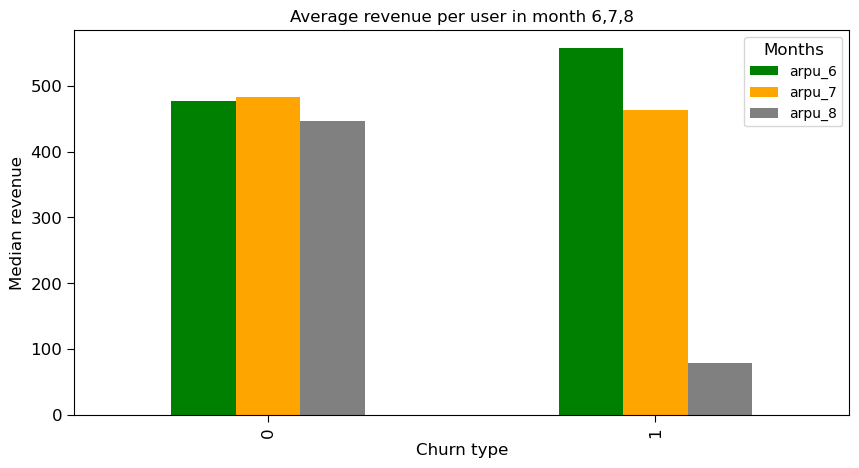

In [54]:
# Plot to visualize average revenue per user(ARPU)
highvalue_cust.groupby("churn")[["arpu_6","arpu_7","arpu_8"]].median().plot.bar(figsize=[10,5],color=['green', 'orange', 'gray'])  
plt.title("Average revenue per user in month 6,7,8",fontsize=12)
plt.legend(title="Months", loc='upper right', fontsize=10, title_fontsize=12)
plt.tick_params(size=5,labelsize = 12) 
plt.ylabel("Median revenue",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.show()

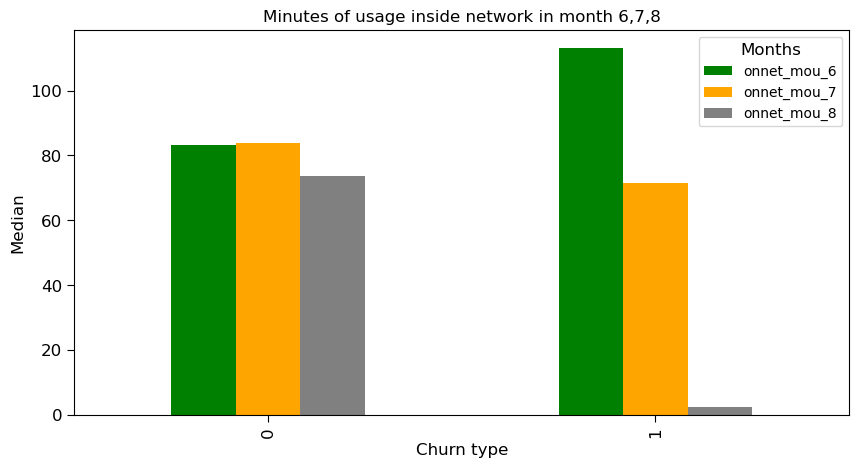

In [55]:
# Plot to visualize onnet_mou
highvalue_cust.groupby("churn")[["onnet_mou_6","onnet_mou_7","onnet_mou_8"]].median().plot.bar(figsize=[10,5],color=['green', 'orange', 'gray'])  
plt.title("Minutes of usage inside network in month 6,7,8",fontsize=12)
plt.legend(title="Months", loc='upper right', fontsize=10, title_fontsize=12)
plt.tick_params(size=5,labelsize = 12) 
plt.ylabel("Median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.show()

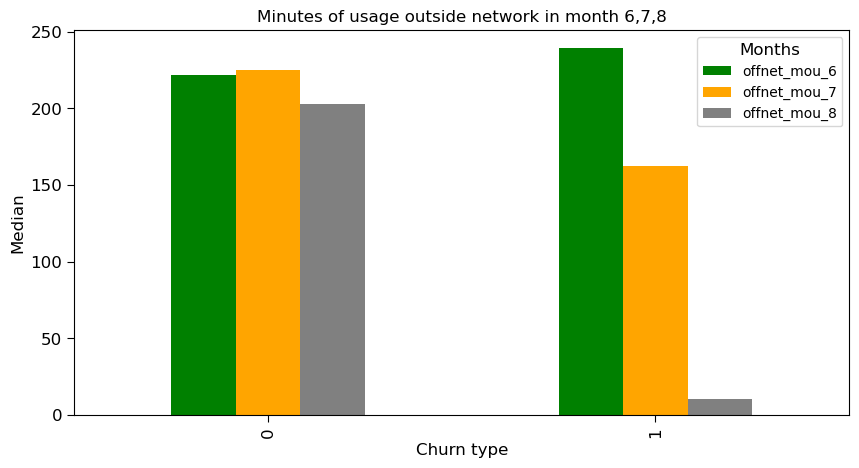

In [56]:
# Plot to visualize offnet_mou
highvalue_cust.groupby("churn")[["offnet_mou_6","offnet_mou_7","offnet_mou_8"]].median().plot.bar(figsize=[10,5],color=['green', 'orange', 'gray'])  
plt.title("Minutes of usage outside network in month 6,7,8",fontsize=12)
plt.legend(title="Months", loc='upper right', fontsize=10, title_fontsize=12)
plt.tick_params(size=5,labelsize = 12) 
plt.ylabel("Median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.show()

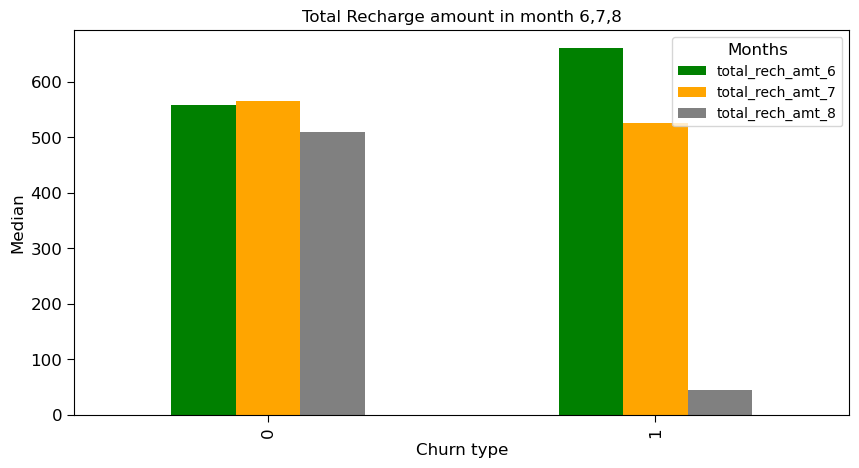

In [57]:
# Plot to visualize total_rech_amt
highvalue_cust.groupby("churn")[["total_rech_amt_6","total_rech_amt_7","total_rech_amt_8"]].median().plot.bar(figsize=[10,5],color=['green', 'orange', 'gray'])  
plt.title("Total Recharge amount in month 6,7,8",fontsize=12)
plt.legend(title="Months", loc='upper right', fontsize=10, title_fontsize=12)
plt.tick_params(size=5,labelsize = 12) 
plt.ylabel("Median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.show()

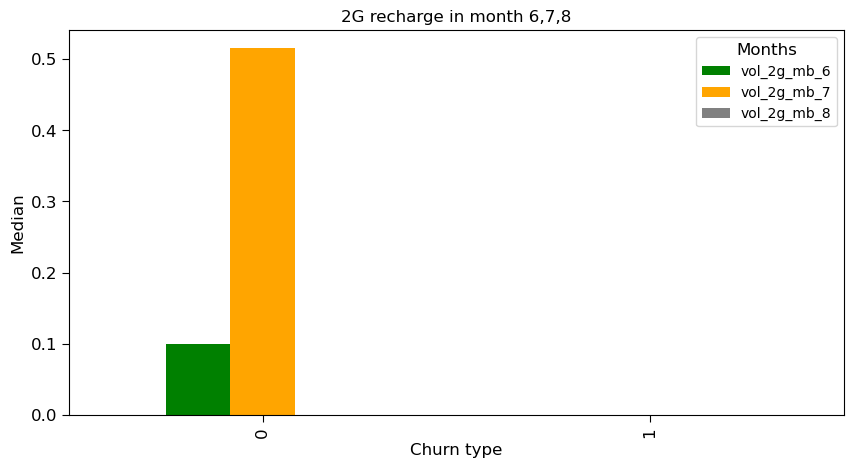

In [58]:
# Plot to visualize vol_2g_mb_6
highvalue_cust.groupby("churn")[["vol_2g_mb_6","vol_2g_mb_7","vol_2g_mb_8"]].median().plot.bar(figsize=[10,5],color=['green', 'orange', 'gray'])  
plt.title("2G recharge in month 6,7,8",fontsize=12)
plt.legend(title="Months", loc='upper right', fontsize=10, title_fontsize=12)
plt.tick_params(size=5,labelsize = 12) 
plt.ylabel("Median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.show()

##### Inference:

1) If Average revenue per user is more in month 6 means, if they are unsatisfied, they are more likely to churn
2) Users whose minutes of usage are more in month 6, they are more likely to churn.
3) Users with big difference of minutes of call duration to other network between month 6 and month 7 are likely to churn.
4) Also, when the difference of total recharge amount is more, those users are more likely to churn.
5) 2g recharge who have not done may or may not churn as there is no concrete evidence from data

In [59]:
# Checking the percenatges of churn in each category of Night Pack Users in month 8
pd.crosstab(highvalue_cust.churn, highvalue_cust.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,97.117602,97.360704
1,14.10877,2.882398,2.639296


In [60]:
# Checking the percenatges of churn in each category of Facebook Users in month 6
(pd.crosstab(highvalue_cust.churn, highvalue_cust.fb_user_8, normalize='columns')*100)

fb_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,93.231707,97.568644
1,14.10877,6.768293,2.431356


##### Inference:

* For Night pack users in month 8, the churn rate is high. i.e., close to 14%
* Close to 2% churn among Facebook users in month 8
* Customers not using facebook, close to 7% churn in month 8

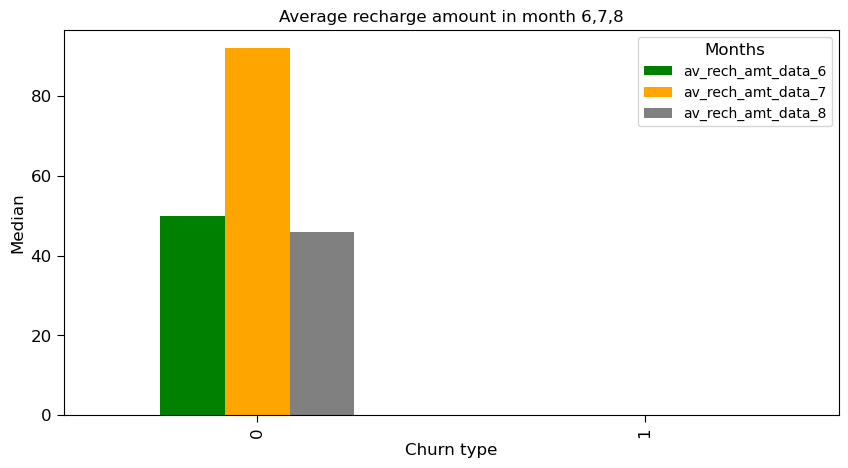

In [61]:
# Plot to visualize av_rech_amt_data
highvalue_cust.groupby("churn")[["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8"]].median().plot.bar(figsize=[10,5],color=['green', 'orange', 'gray'])  
plt.title("Average recharge amount in month 6,7,8",fontsize=12)
plt.legend(title="Months", loc='upper right', fontsize=10, title_fontsize=12)
plt.tick_params(size=5,labelsize = 12) 
plt.ylabel("Median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.show()

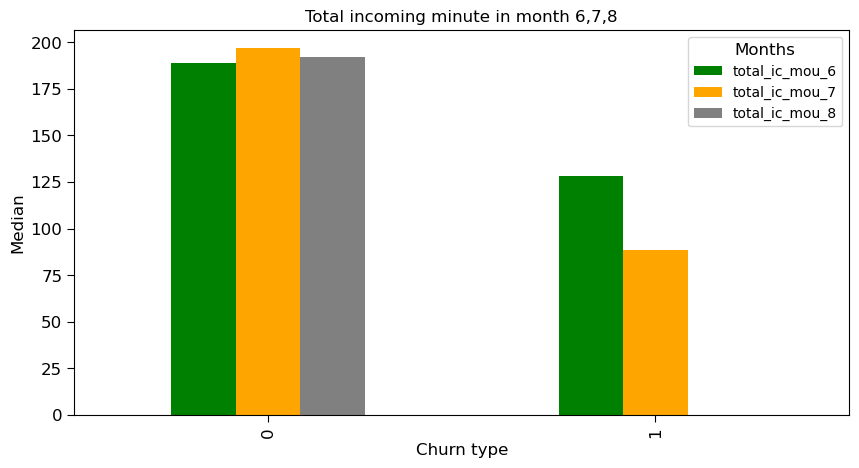

In [62]:
# Plot to visualize total_ic_mou
highvalue_cust.groupby("churn")[["total_ic_mou_6","total_ic_mou_7","total_ic_mou_8"]].median().plot.bar(figsize=[10,5],color=['green', 'orange', 'gray'])  
plt.title("Total incoming minute in month 6,7,8",fontsize=12)
plt.legend(title="Months", loc='upper right', fontsize=10, title_fontsize=12)
plt.tick_params(size=5,labelsize = 12) 
plt.ylabel("Median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.show()

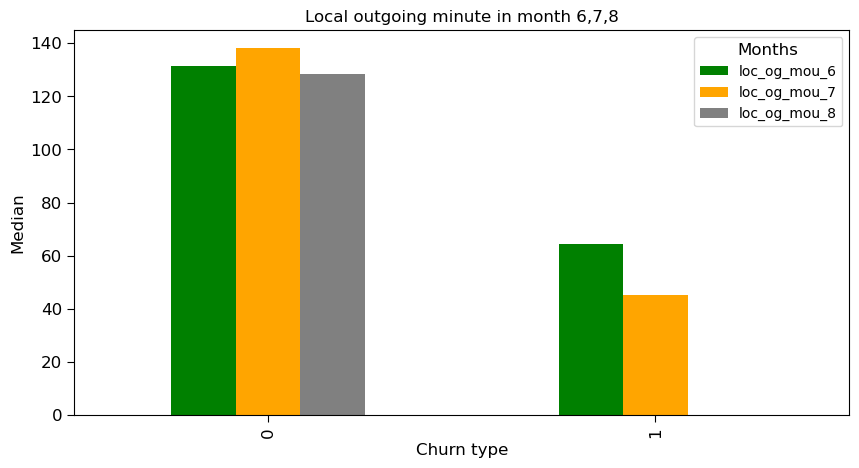

In [63]:
# Plot to visualize loc_og_mou
highvalue_cust.groupby("churn")[["loc_og_mou_6","loc_og_mou_7","loc_og_mou_8"]].median().plot.bar(figsize=[10,5],color=['green', 'orange', 'gray'])  
plt.title("Local outgoing minute in month 6,7,8",fontsize=12)
plt.legend(title="Months", loc='upper right', fontsize=10, title_fontsize=12)
plt.tick_params(size=5,labelsize = 12) 
plt.ylabel("Median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.show()

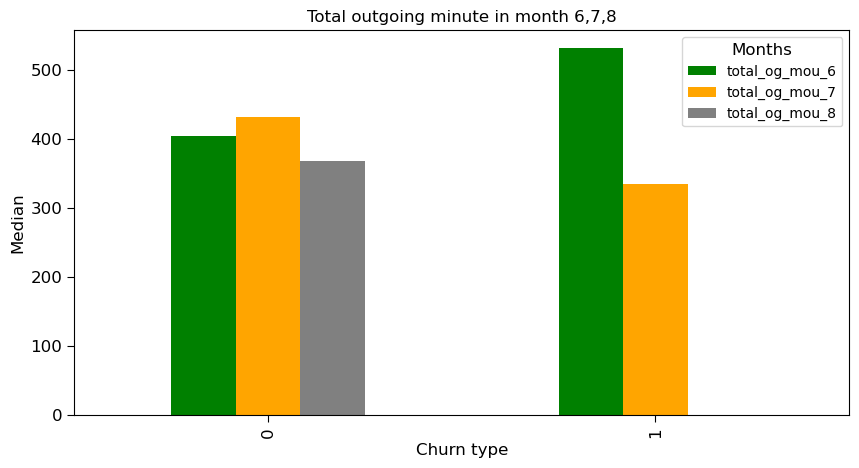

In [64]:
# Plot to visualize total_og_mou
highvalue_cust.groupby("churn")[["total_og_mou_6","total_og_mou_7","total_og_mou_8"]].median().plot.bar(figsize=[10,5],color=['green', 'orange', 'gray'])  
plt.title("Total outgoing minute in month 6,7,8",fontsize=12)
plt.legend(title="Months", loc='upper right', fontsize=10, title_fontsize=12)
plt.tick_params(size=5,labelsize = 12) 
plt.ylabel("Median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.show()

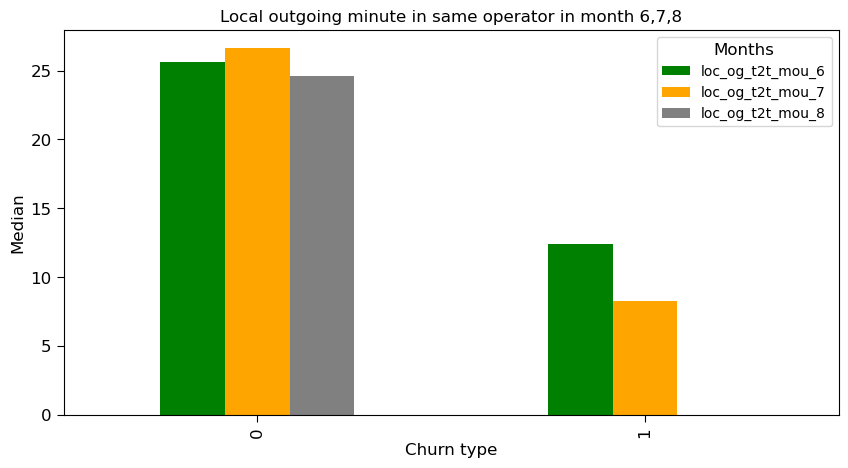

In [65]:
# Plot to visualize loc_og_t2t_mou
highvalue_cust.groupby("churn")[["loc_og_t2t_mou_6","loc_og_t2t_mou_7","loc_og_t2t_mou_8"]].median().plot.bar(figsize=[10,5],color=['green', 'orange', 'gray'])  
plt.title("Local outgoing minute in same operator in month 6,7,8",fontsize=12)
plt.legend(title="Months", loc='upper right', fontsize=10, title_fontsize=12)
plt.tick_params(size=5,labelsize = 12) 
plt.ylabel("Median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.show()

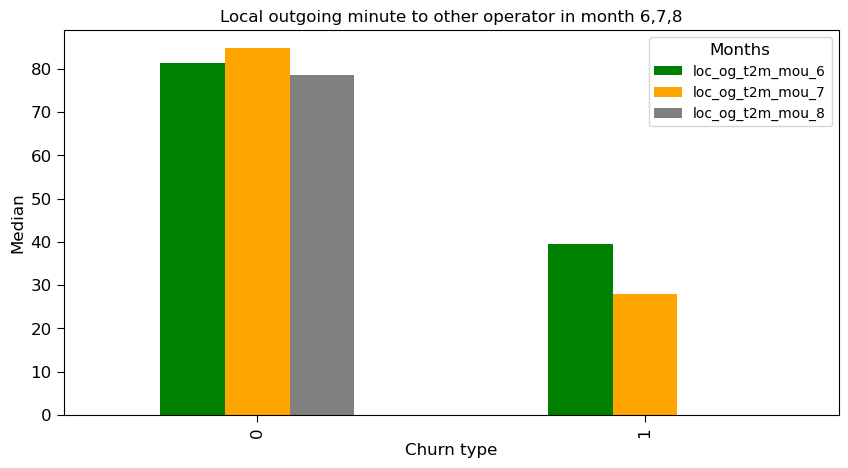

In [66]:
# Plot to visualize loc_og_t2m_mou
highvalue_cust.groupby("churn")[["loc_og_t2m_mou_6","loc_og_t2m_mou_7","loc_og_t2m_mou_8"]].median().plot.bar(figsize=[10,5],color=['green', 'orange', 'gray'])  
plt.title("Local outgoing minute to other operator in month 6,7,8",fontsize=12)
plt.legend(title="Months", loc='upper right', fontsize=10, title_fontsize=12)
plt.tick_params(size=5,labelsize = 12) 
plt.ylabel("Median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.show()

##### Inference:
1) When the average recharge amount in month 6,7,8 is none, they are more likely to churn
2) Users with more difference in Total incoming minutes in month 6 & 7 are more likely to churn
3) Users are likely to churn when local outgoing minutes are less
4) When Total outgoing minute usage difference is more between months 6 and 7, users are expected to churn
5) Users with less Local outgoing minute in same operator in months 6,7,8 are more likely to churn
6) Also, users with less Local outgoing minute to other operator are expected to churn

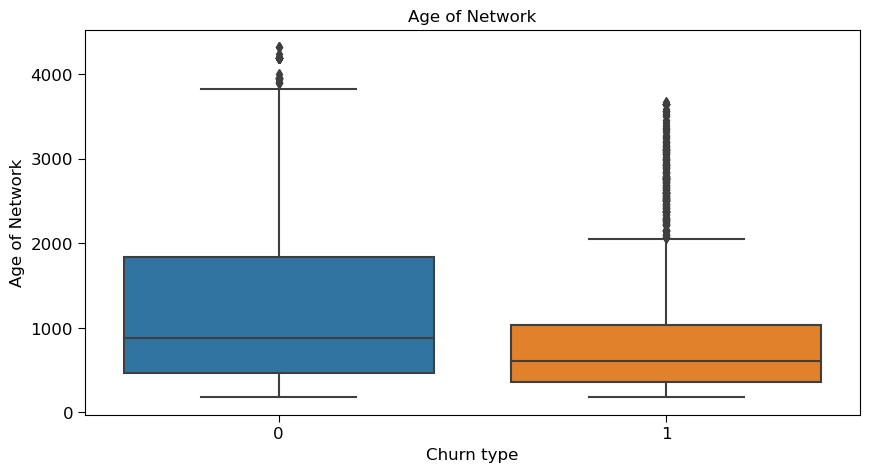

In [67]:
plt.figure(figsize=[10,5])
sns.boxplot(data=highvalue_cust,x="churn",y="aon")
plt.tick_params(size=5,labelsize = 12) 
plt.title("Age of Network",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.ylabel("Age of Network",fontsize=12)
plt.show()

##### Users churning have lower Median Age of Network

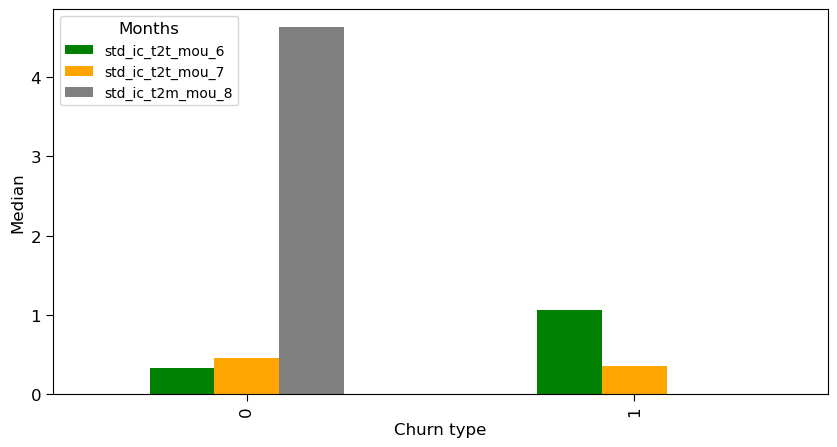

In [68]:
# Plot to visualize std_ic_t2t_mou
highvalue_cust.groupby("churn")[["std_ic_t2t_mou_6","std_ic_t2t_mou_7","std_ic_t2m_mou_8"]].median().plot.bar(figsize=[10,5],color=['green', 'orange', 'gray'])  
plt.legend(title="Months", loc='upper left', fontsize=10, title_fontsize=12)
plt.tick_params(size=5,labelsize = 12) 
plt.ylabel("Median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.show()

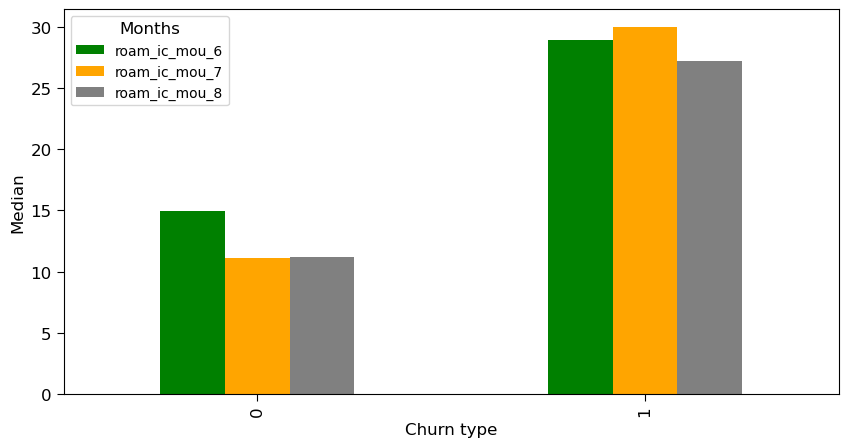

In [69]:
highvalue_cust.groupby("churn")[["roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8"]].mean().plot.bar(figsize=[10,5],color=['green', 'orange', 'gray'])
plt.legend(title="Months", loc='upper left', fontsize=10, title_fontsize=12)
plt.tick_params(size=5,labelsize = 12) 
plt.ylabel("Median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.show()

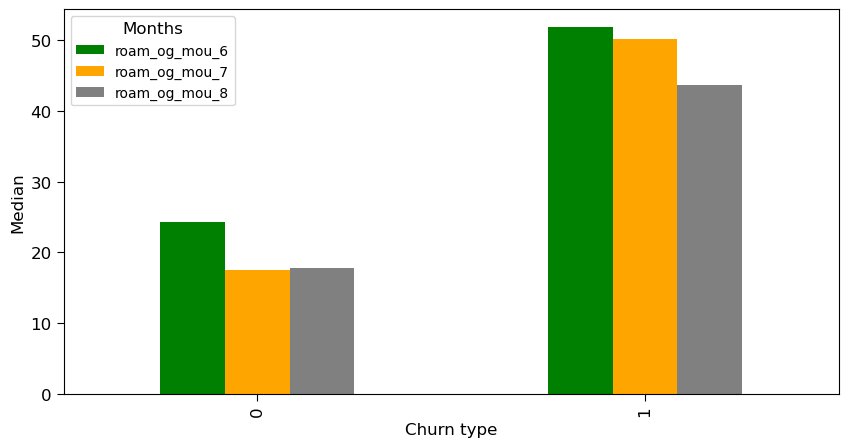

In [70]:
highvalue_cust.groupby("churn")[["roam_og_mou_6","roam_og_mou_7","roam_og_mou_8"]].mean().plot.bar(figsize=[10,5],color=['green', 'orange', 'gray'])
plt.legend(title="Months", loc='upper left', fontsize=10, title_fontsize=12)
plt.tick_params(size=5,labelsize = 12) 
plt.ylabel("Median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.show()

##### Inference:
Below types of users are more likely to churn
1. Users who are using more STD calls
2. Users with more Roaming in Incoming minutes
3. Users with more Roaming in Outgoing minutes

### Step 4: Data Preparation

###### Train and Test data split

In [71]:
# Splitting to train and test dataset
train,test = train_test_split(highvalue_cust,test_size=0.3,random_state=100)

In [72]:
print(f"train data shape:{train.shape}")
print(f"Test data shape:{test.shape}")

train data shape:(21000, 164)
Test data shape:(9001, 164)


In [73]:
# Converting categorical data to numeric columns by aggregation.
categorical_col = ["night_pck_user_6","night_pck_user_7","night_pck_user_8","fb_user_6","fb_user_8","fb_user_7"]  

In [74]:
train[categorical_col].head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_8,fb_user_7
39186,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
39833,0.0,0.0,0.0,1.0,1.0,1.0
38778,0.0,0.0,-1.0,1.0,-1.0,1.0
43026,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
12271,0.0,0.0,0.0,1.0,1.0,1.0


In [75]:
# Calculating categorical features mean and replace those with categorical value
print(train.groupby('night_pck_user_6')["churn"].mean())
print(train.groupby('night_pck_user_7')["churn"].mean())
print(train.groupby('night_pck_user_8')["churn"].mean())
print(train.groupby('fb_user_6')["churn"].mean())
print(train.groupby('fb_user_7')["churn"].mean())
print(train.groupby('fb_user_8')["churn"].mean())

night_pck_user_6
-1.0    0.097337
 0.0    0.066789
 1.0    0.088136
Name: churn, dtype: float64
night_pck_user_7
-1.0    0.113402
 0.0    0.055655
 1.0    0.060284
Name: churn, dtype: float64
night_pck_user_8
-1.0    0.140112
 0.0    0.028431
 1.0    0.033195
Name: churn, dtype: float64
fb_user_6
-1.0    0.097337
 0.0    0.080702
 1.0    0.066276
Name: churn, dtype: float64
fb_user_7
-1.0    0.113402
 0.0    0.064103
 1.0    0.055058
Name: churn, dtype: float64
fb_user_8
-1.0    0.140112
 0.0    0.062943
 1.0    0.024685
Name: churn, dtype: float64


In [76]:
# Mapping each categorical value with mean value
mapping = {'night_pck_user_6' : {-1: 0.097337, 0: 0.066789, 1: 0.088136},
           'night_pck_user_7' : {-1: 0.113402, 0: 0.055655, 1: 0.060284},
           'night_pck_user_8' : {-1: 0.140112, 0: 0.028431, 1: 0.033195},
           'fb_user_6'        : {-1: 0.097337, 0: 0.080702, 1: 0.066276},
           'fb_user_7'        : {-1: 0.113402, 0: 0.064103, 1: 0.055058},
           'fb_user_8'        : {-1: 0.140112, 0: 0.062943, 1: 0.024685}}

# converting categorical to Numeric features by aggregation and replace in train data
train.replace(mapping, inplace = True)
# replacing the same in test data
test.replace(mapping, inplace = True)

In [77]:
# Segregating  X_train and y_train 
y_train = train.pop("churn")
X_train = train

In [78]:
# Similarly segregating X_test and y_test
y_test = test.pop("churn")
X_test = test

### Step 5 : Performing Oversampling with SMOTE

##### Because of imbalance in data set, we will oversample only the training set data

In [79]:
# pip uninstall imbalanced-learn scikit-learn

In [80]:
# pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1

In [81]:
# Performing oversampling with traing data and passing both X_train and y_train to SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=100)
X_train_resample,y_train_resample = smote.fit_resample(X_train,y_train)

In [82]:
# Checking the shape after Oversampling
print(f"Shape of train data after oversampling: {X_train_resample.shape}")
print(f"Value count of training target variable:\n{y_train_resample.value_counts()}")

Shape of train data after oversampling: (38618, 163)
Value count of training target variable:
churn
0    19309
1    19309
Name: count, dtype: int64


##### Now the non-churn and churn data is balanced.

##### Variable scaling

In [83]:
# Using MinMaxScaler for rescaling the features

scaler = MinMaxScaler()
temp_x_train = scaler.fit_transform(X_train_resample)

#Forming the dataframe after scaling
X_train_scale = pd.DataFrame(temp_x_train,columns=X_train.columns)
# Checking the shape of scaled data
X_train_scale.shape

(38618, 163)

In [84]:
X_train_scale.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.111540,0.078696,0.027671,0.000771,0.001015,0.000450,0.018164,0.016449,0.007001,0.011185,0.006991,0.010734,0.001939,0.005114,0.001847,0.000838,0.001032,0.000450,0.004573,0.006710,0.003993,0.000812,0.000000,0.000000,0.0,0.011234,0.003127,0.002652,0.005075,0.002234,0.000000,0.000000,0.000000,0.000314,0.001173,0.000951,0.000000,0.000000,0.000000,0.000309,0.000996,0.000948,0.02044,0.017391,0.009506,0.000000,0.006755,0.001403,0.00000,0.0,0.0,0.014190,0.013454,0.006625,0.003504,0.008845,0.011518,0.028578,0.033796,0.022729,0.004278,0.004912,0.001372,0.021011,0.032866,0.028548,0.000000,0.000000,0.000000,0.003767,0.009489,0.010195,0.000000,0.000000,0.000000,0.003194,0.004882,0.009662,0.056128,0.047886,0.043947,0.000000,0.0,0.0,0.038149,0.028535,0.016077,0.000000,0.001344,0.000000,0.058824,0.041667,0.015306,0.042086,0.022115,0.014519,0.099252,0.114464,0.051472,0.099252,0.008728,0.044954,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.838203,0.000000,0.000000,0.000000,0.0,0.161482,0.454145,0.357233,0.358483,0.440828,0.454867,0.359521,0.485744,0.596748,0.358033,0.521890,0.470049,0.619954,0.785335,0.607036,0.422414,0.229558,0.403865,0.309211,0.490772,0.489464,0.324535,0.441836
1,0.092434,0.062585,0.020929,0.019642,0.006110,0.003786,0.038403,0.023547,0.018948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010023,0.004269,0.003786,0.058659,0.039398,0.042642,0.008281,0.004330,0.05871

In [85]:
# Performing the scaling on test set
temp_x_test = scaler.transform(X_test)
# Forming the test set dataframe after scaling
X_test_scale = pd.DataFrame(temp_x_test,columns=X_test.columns)

In [86]:
X_test_scale.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.093297,0.068666,0.018477,0.002157,0.000675,0.000743,0.006486,0.001537,0.001596,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000546,0.000448,0.000743,0.009510,0.000968,0.002820,0.002442,0.001262,0.002873,0.000111,0.000000,0.000000,0.004893,0.001221,0.002146,0.001682,0.000283,0.000000,0.000560,0.000962,0.000411,0.002899,0.000000,0.001760,0.002139,0.001027,0.000476,0.0,0.0,0.0,0.001251,0.002678,0.003942,0.000000,0.000000,0.0,0.006690,0.002092,0.002383,0.001945,0.001270,0.000659,0.010895,0.007762,0.004531,0.005231,0.007821,0.014454,0.009180,0.009359,0.008659,0.005209,0.000000,0.000000,0.001730,0.000487,0.000645,0.004041,0.000000,0.000000,0.007680,0.000251,0.000611,0.014302,0.007344,0.008293,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088235,0.091667,0.020408,0.020176,0.018520,0.006664,0.029925,0.037406,0.032367,0.007481,0.037406,0.032367,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.00000,1.0,0.00,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.0000,0.0,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.117604,0.000000,0.000000,0.000000,0.0,0.170894,0.454096,0.359528,0.357573,0.440900,0.455047,0.358791,0.532149,0.598922,0.360286,0.522358,0.461138,0.636286,0.785335,0.617469,0.405172,0.234842,0.433827,0.309211,0.490772,0.489464,0.324535,0.441836
1,0.077965,0.059802,0.012510,0.002153,0.001144,0.000880,0.003182,0.002207,0.000254,0.002225,0.0,0.001166,0.00123,0.003656,0.000948,0.001227,0.000134,0.000269,0.000235,0.000891,0.000016,0.000000,0.000000,0.000000,0.

### Step 6 : PCA

In [87]:
# To remove collinearity and faster training we can perform dimensionality reduction technique PCA.
# We will use X_train_scale and X_test_scale in PCA

pc_class = PCA(random_state=100)
X_train_pca = pc_class.fit(X_train_scale)

In [88]:
X_train_pca.explained_variance_ratio_

array([6.04986921e-01, 1.46451140e-01, 9.93599937e-02, 2.92104671e-02,
       1.72975878e-02, 1.12357418e-02, 9.38646630e-03, 7.84035632e-03,
       6.44814978e-03, 5.98810002e-03, 5.22314222e-03, 3.64846932e-03,
       3.42772495e-03, 3.01398932e-03, 2.71214964e-03, 2.49475439e-03,
       2.11480902e-03, 2.01854761e-03, 1.93895273e-03, 1.90140150e-03,
       1.64671165e-03, 1.63730321e-03, 1.54299594e-03, 1.43911116e-03,
       1.31684821e-03, 1.25949777e-03, 1.17642717e-03, 1.11578954e-03,
       1.04778146e-03, 1.02376734e-03, 9.94103585e-04, 9.22748758e-04,
       8.91374405e-04, 8.54632266e-04, 7.97989535e-04, 7.54806463e-04,
       7.06819645e-04, 6.76123413e-04, 6.46770420e-04, 6.30923605e-04,
       5.73611583e-04, 5.26765337e-04, 4.78560937e-04, 4.61777444e-04,
       4.34433336e-04, 4.22538436e-04, 3.88611002e-04, 3.56274276e-04,
       3.44380086e-04, 3.33358849e-04, 3.23763319e-04, 3.10944695e-04,
       2.97893714e-04, 2.96069716e-04, 2.82670029e-04, 2.74926974e-04,
      

In [89]:
# Performing the cumulative sum of explained variance
var_cum = np.cumsum(X_train_pca.explained_variance_ratio_)

# Converting explained variance to DataFrame
var_cum_df = pd.DataFrame({"variance":var_cum}) 
var_cum_df.head() 

,variance
0,0.604987
1,0.751438
2,0.850798
3,0.880009
4,0.897306


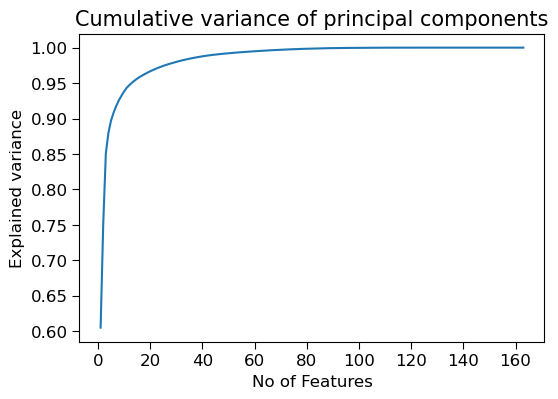

In [90]:
# Plotting the cumulative explained variance
plt.figure(figsize=[6,4])
plt.plot(range(1,len(var_cum)+1), var_cum)
plt.title("Cumulative variance of principal components",size=15)
plt.ylabel("Explained variance",size=12)
plt.xlabel("No of Features",size=12)
plt.tick_params(size=5,labelsize = 12)

In [91]:
# Providing variance value to get the suitable principal components.
pca_demo = PCA(0.96,random_state=100)
X_train_pca1 = pca_demo.fit_transform(X_train_scale)
print(f"Suitable principal components for 96% of variance:{X_train_pca1.shape[1]}")

Suitable principal components for 96% of variance:17


In [92]:
# Instantiating PCA with 17 components 
pca_object = PCA(n_components=17,random_state=100)
# Getting the PCs for train data
X_train_pca_final = pca_object.fit_transform(X_train_scale)
# Getting the PCs for test data
X_test_pca_final = pca_object.fit_transform(X_test_scale)

In [93]:
# Checking the shape of train and test data after PCA
print(X_train_pca_final.shape)
print(X_test_pca_final.shape)

(38618, 17)
(9001, 17)


In [94]:
# Checking the correlations after PCA
np.corrcoef(X_train_pca_final.transpose())

array([[ 1.00000000e+00, -5.29463972e-17,  9.26390681e-17,
         5.23029137e-18,  5.66397223e-18,  1.68664722e-17,
        -5.22843533e-17,  2.18735533e-17, -1.26163942e-16,
        -4.62073082e-17,  6.18442592e-18, -1.23327674e-18,
         7.63424791e-17, -1.62834535e-17,  5.58033416e-17,
        -5.37094629e-17, -5.34745881e-17],
       [-5.29463972e-17,  1.00000000e+00,  7.49306195e-17,
        -2.71852143e-17, -2.18726464e-17, -2.57105953e-17,
        -4.06314939e-17, -1.88089820e-17,  1.69693600e-17,
         1.51634404e-17,  3.07696556e-17, -4.07324489e-18,
        -6.46519505e-18,  8.27395474e-18, -9.99689016e-19,
        -2.50166338e-17, -2.96416675e-17],
       [ 9.26390681e-17,  7.49306195e-17,  1.00000000e+00,
        -8.33515259e-18,  1.39761750e-18, -2.02675779e-17,
         1.26880195e-17, -1.54397472e-17, -4.86432395e-18,
        -4.15694900e-18,  4.76888258e-19,  3.04318081e-18,
        -1.29510857e-17, -7.06295243e-18,  2.27289857e-17,
         2.48495939e-17, -3.1

##### The correlation values are almost close to 0

### Step 7 : Model building

In this step, below models will be explored:

* Logistic regression
* Decision tree
* Randomforest
* Gradientboosting
* XGboos

In [95]:
# Checking the performance on the test set

def calculate_peformance_testdata(model_name,y_test,y_pred,pred_prob):
        
    '''y_test:Test Labels,
       y_pred: Prediction Labels ,
       pred_prob:Predicted Probability  '''
    
    print(f"{model_name}:")
    precision = metrics.precision_score(y_test,y_pred)
    print(f"precision: {precision}")
    recall = metrics.recall_score(y_test,y_pred)
    print(f"recall: {recall}")
    f1_score = metrics.f1_score(y_test,y_pred)
    print(f"f1_score: {f1_score}")
    roc_auc = metrics.roc_auc_score(y_test,pred_prob)
    print(f"roc_auc: {roc_auc}")
#   Returning a DataFrame with all the score
    return pd.DataFrame({"Model":[model_name],"precision":[precision],"recall":[recall],"f1_score":[f1_score],
                         "roc_auc":[roc_auc]})   

In [96]:
# Creating a DataFrame which stores all test score for each model
score_df = pd.DataFrame({"Model":[None],"precision":[None],"recall":[None],"f1_score":[None],"roc_auc":[None]})

#### Logistic Regression

In [97]:
#Instantiating logistic regression
lr = LogisticRegression(random_state=100)
# Passing PCA data as input
lr.fit(X_train_pca_final, y_train_resample)
cv_score = cross_val_score(lr, X_train_pca_final, y_train_resample, cv=5, scoring='f1_micro')
print(f"Cross validation score: {cv_score}")

Cross validation score: [0.82392543 0.83661315 0.84049715 0.83452026 0.83257801]


In [98]:
# Predicting on pca testdata
y_pred_lr = lr.predict(X_test_pca_final)
# checking predict probability on pca data
pred_prob = lr.predict_proba(X_test_pca_final)

In [99]:
# Checking scores on test data
df1 = calculate_peformance_testdata("LogisticRegression",y_test,y_pred_lr,pred_prob[:,1])

LogisticRegression:
precision: 0.09707750952986023
recall: 0.5093333333333333
f1_score: 0.16307363927427962
roc_auc: 0.5724970710620935


In [100]:
# Adding the score to dataframe for comparision with other model performance
score_df= score_df.dropna()
score_df = pd.concat([score_df, df1], ignore_index=True)
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.097078,0.509333,0.163074,0.572497


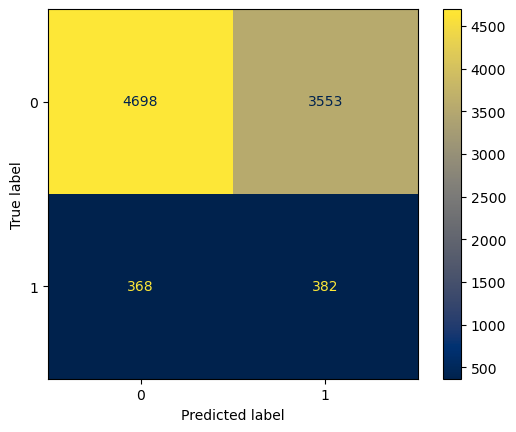

In [101]:
# Plotting confusion matrix for Logistic Regression 
ConfusionMatrixDisplay.from_estimator(lr, X_test_pca_final, y_test, cmap='cividis')
plt.show()

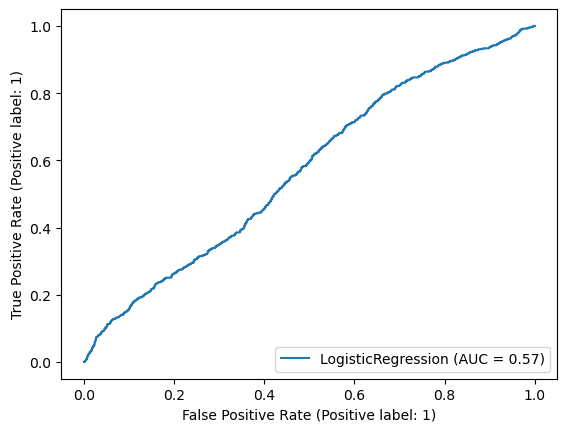

In [102]:
# Plotting ROC_AUC Curve for Logistic Regression
RocCurveDisplay.from_estimator(lr, X_test_pca_final, y_test)
plt.show()

#### Decision Tree

In [103]:
# Instantiate Decision tree with default parameter
dt =  DecisionTreeClassifier(random_state=100)

# Using the data generated by SMOTE. 
dt.fit(X_train_scale, y_train_resample)
cv_score = cross_val_score(dt, X_train_scale, y_train_resample, cv=5, scoring='f1_micro')
print(cv_score)

[0.88801139 0.92711031 0.92840497 0.92489965 0.92671242]


In [104]:
# Checking the default paramters 
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 100,
 'splitter': 'best'}

In [105]:
# Performing hyperparamter tuning with randomizedsearchcv
param_grid = dict({"max_leaf_nodes":[4,5,6],"min_samples_leaf":[3,4,5],'min_samples_split':[3,4,5]})
dt_clf = DecisionTreeClassifier(random_state=100)
dt_clf_rcv = RandomizedSearchCV(dt_clf,param_grid,cv=5,scoring="f1_micro")# n_jobs=-1
dt_clf_rcv.fit(X_train_scale, y_train_resample)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
                   param_distributions={'max_leaf_nodes': [4, 5, 6],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [3, 4, 5]},
                   scoring='f1_micro')

In [106]:
# Checking the best score and best estimator paramters
print(dt_clf_rcv.best_score_)
print(dt_clf_rcv.best_estimator_)

0.8501995358044964
DecisionTreeClassifier(max_leaf_nodes=5, min_samples_leaf=4,
                       min_samples_split=5, random_state=100)


In [107]:
dt_clf_rcv.cv_results_

{'mean_fit_time': array([2.08328037, 2.10458384, 2.09496865, 2.23395934, 2.48378291,
        2.49665537, 2.20897107, 2.0986393 , 2.4783134 , 2.0377502 ]),
 'std_fit_time': array([0.02662836, 0.02174315, 0.01574109, 0.02379332, 0.0114847 ,
        0.02130639, 0.02064036, 0.01350115, 0.01232819, 0.05774391]),
 'mean_score_time': array([0.01605682, 0.01573935, 0.01835284, 0.01400738, 0.01682839,
        0.0185472 , 0.01640716, 0.01900806, 0.01938133, 0.02231841]),
 'std_score_time': array([0.00082099, 0.00021631, 0.00761268, 0.00376531, 0.00172521,
        0.00576935, 0.00156423, 0.00627906, 0.00750364, 0.0073427 ]),
 'param_min_samples_split': masked_array(data=[3, 3, 3, 5, 4, 3, 3, 4, 3, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[5, 4, 3, 4, 4, 3, 3, 4, 4, 3],
              mask=[False, False, False, False, False, False

In [108]:
# Training the decision tree with best parameters obtained

dt_clf = DecisionTreeClassifier(max_leaf_nodes=5,min_samples_leaf=4,min_samples_split=5,random_state=100)
dt_clf.fit(X_train_scale,y_train_resample)

DecisionTreeClassifier(max_leaf_nodes=5, min_samples_leaf=4,
                       min_samples_split=5, random_state=100)

In [109]:
# Performing the prediction 
y_pred_dt = dt_clf.predict(X_test_scale)
# Performing the prediction probability
pred_prob = dt_clf.predict_proba(X_test_scale)

In [110]:
# Checking the scores.
df2 = calculate_peformance_testdata("DecisionTree",y_test,y_pred_dt,pred_prob[:,1])

DecisionTree:
precision: 0.3459863098942128
recall: 0.7413333333333333
f1_score: 0.4717861688587187
roc_auc: 0.8582539490162809


In [111]:
# Adding the score to Dataframe for comparision 
score_df = pd.concat([score_df, df2], ignore_index=True)
score_df.dropna(inplace=True)
score_df.drop_duplicates(inplace=True)
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.097078,0.509333,0.163074,0.572497
1,DecisionTree,0.345986,0.741333,0.471786,0.858254


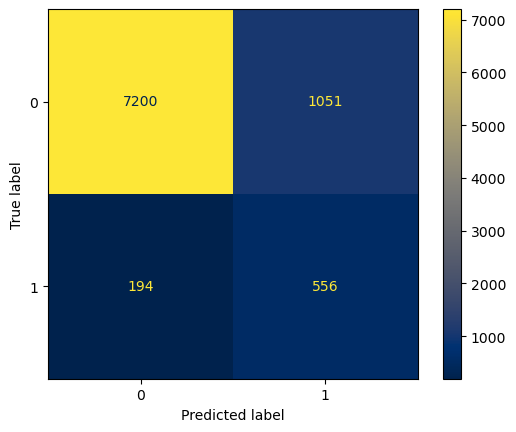

In [112]:
# Visualizing through the confusion matrix
ConfusionMatrixDisplay.from_estimator(dt_clf, X_test_scale, y_test,cmap='cividis')
plt.show()

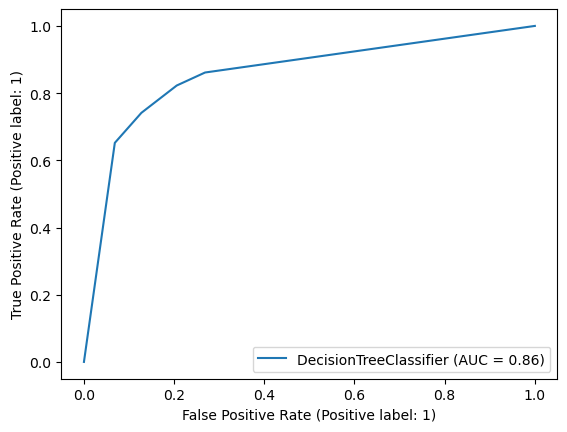

In [113]:
# Plotting the ROC_AUC curve
RocCurveDisplay.from_estimator(dt_clf, X_test_scale, y_test)
plt.show()

#### Random Forest

In [114]:
# Instantiating RandomForest, train with default parameters
rf = RandomForestClassifier(n_jobs=-1) 
rf.fit(X_train_scale,y_train_resample)
y_pred_rf = rf.predict(X_test_scale)
pred_prob = rf.predict_proba(X_test_scale)

In [115]:
# Checking the default parameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [116]:
# Performing hyperparameter tuning
param_grid = dict({"n_estimators":[90,110],"min_samples_split":[2,3],"min_samples_leaf":[2,3]})
rf = RandomForestClassifier(random_state=100,n_jobs=-1)
rf_clf_rcv = RandomizedSearchCV(rf,param_grid,cv=5,scoring="f1_micro")
rf_clf_rcv.fit(X_train_scale,y_train_resample)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=100),
                   param_distributions={'min_samples_leaf': [2, 3],
                                        'min_samples_split': [2, 3],
                                        'n_estimators': [90, 110]},
                   scoring='f1_micro')

In [117]:
# Checking the best parameters and score in cross validation 
print(rf_clf_rcv.best_score_)
print(rf_clf_rcv.best_estimator_)

0.9625048003056103
RandomForestClassifier(min_samples_leaf=2, n_estimators=90, n_jobs=-1,
                       random_state=100)


In [118]:
# Using best paramters to train the model
rf = RandomForestClassifier(min_samples_leaf=2,n_estimators=90,n_jobs=-1,random_state=100)
rf.fit(X_train_scale,y_train_resample)
y_pred_rf = rf.predict(X_test_scale)
pred_prob = rf.predict_proba(X_test_scale)

In [119]:
# Checking the scores 
df3 = calculate_peformance_testdata("RandomForest",y_test,y_pred_rf,pred_prob[:,1])

RandomForest:
precision: 0.5952941176470589
recall: 0.6746666666666666
f1_score: 0.6325000000000001
roc_auc: 0.9271362663111542


In [120]:
# Adding score to the dataframe for comparision 
score_df = pd.concat([score_df, df3], ignore_index=True)
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.097078,0.509333,0.163074,0.572497
1,DecisionTree,0.345986,0.741333,0.471786,0.858254
2,RandomForest,0.595294,0.674667,0.632500,0.927136


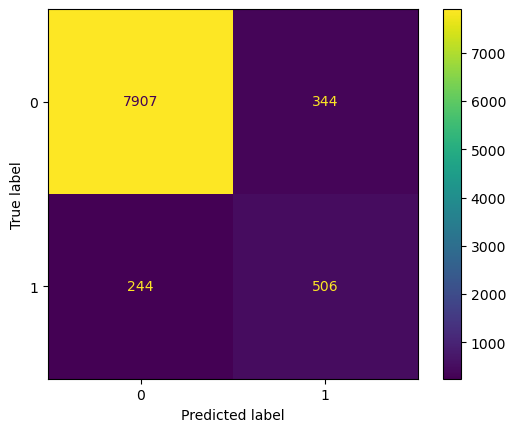

In [121]:
# Visualizing confusion matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test_scale, y_test, cmap='viridis')
plt.show()

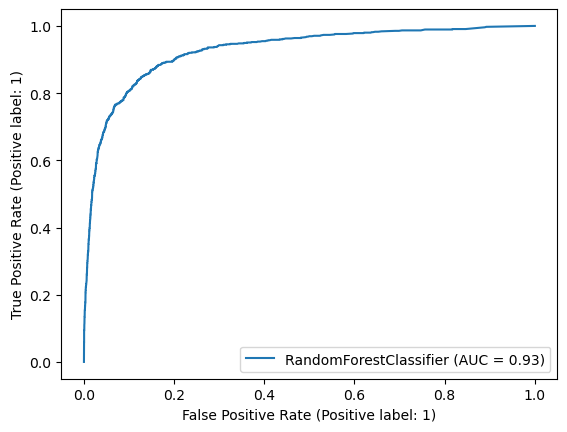

In [122]:
# Plotting the ROC_AUC curve
RocCurveDisplay.from_estimator(rf, X_test_scale, y_test)
plt.show()

#### Gradient Boosting

In [123]:
# Training gradient boosting with default parameters
gb = GradientBoostingClassifier(random_state=100,min_samples_leaf=4,min_samples_split=5)
gb.fit(X_train_scale,y_train_resample)

# Getting the predicated label
y_pred_gb = gb.predict(X_test_scale)
# Getting the predicted probability
pred_prob = gb.predict_proba(X_test_scale)

In [124]:
# Checking the training default parameters
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 100,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [125]:
# Hyperparameter tuning 
%time
param_grid = dict({"max_iter":[90,110], "min_samples_leaf":[2,3], "learning_rate":[.2,.3], "max_depth": [3, 5, 7] })

gb_cv = HistGradientBoostingClassifier(random_state=100) 
gb_clf_rcv = RandomizedSearchCV(gb_cv,param_grid,cv=5,scoring="f1_micro", n_jobs=-1)

CPU times: total: 0 ns
Wall time: 0 ns


In [126]:
gb_clf_rcv.fit(X_train_scale,y_train_resample)

RandomizedSearchCV(cv=5,
                   estimator=HistGradientBoostingClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.2, 0.3],
                                        'max_depth': [3, 5, 7],
                                        'max_iter': [90, 110],
                                        'min_samples_leaf': [2, 3]},
                   scoring='f1_micro')

In [127]:
# Checking the scores and best paramters 
print(gb_clf_rcv.best_score_)
print(gb_clf_rcv.best_estimator_)

0.958517809125432
HistGradientBoostingClassifier(learning_rate=0.2, max_depth=7, max_iter=110,
                               min_samples_leaf=2, random_state=100)


In [128]:
# Checking the test scores
df4 = calculate_peformance_testdata("GradientBoosting",y_test,y_pred_gb,pred_prob[:,1])

GradientBoosting:
precision: 0.5126522961574508
recall: 0.7293333333333333
f1_score: 0.6020913593835993
roc_auc: 0.9195219973336566


In [129]:
# Adding the scores to dataframe
score_df=pd.concat([score_df, df4], ignore_index=True)
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.097078,0.509333,0.163074,0.572497
1,DecisionTree,0.345986,0.741333,0.471786,0.858254
2,RandomForest,0.595294,0.674667,0.632500,0.927136
3,GradientBoosting,0.512652,0.729333,0.602091,0.919522


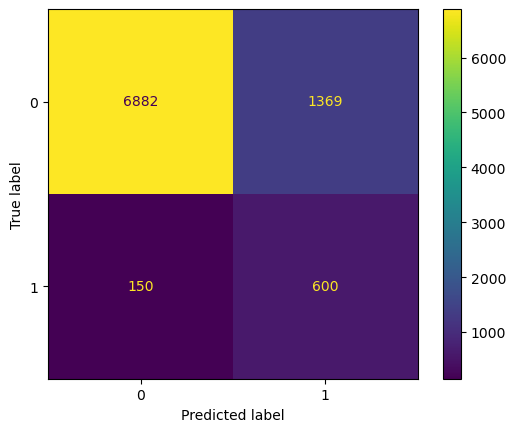

In [130]:
# Visualizing confusion matrix
ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test, cmap='viridis')
plt.show()

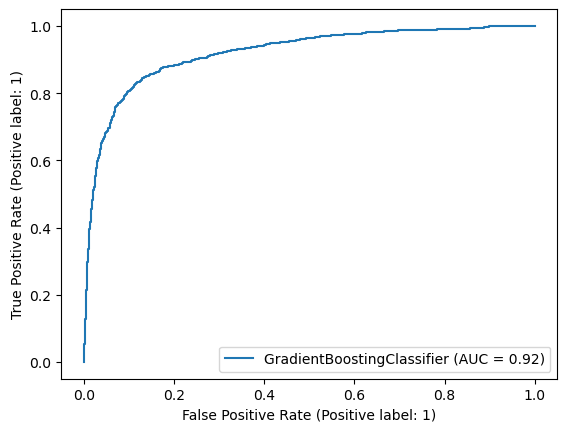

In [131]:
# Plotting the ROC_AUC curve
RocCurveDisplay.from_estimator(gb, X_test_scale, y_test)
plt.show()

#### XGBoost

In [132]:
!pip install xgboost

In [133]:
# Training the model with default parameters

xgb = XGBClassifier(max_depth=10,random_state=100, n_jobs=-1)
xgb.fit(X_train_scale,y_train_resample)

# Model prediction 
y_pred_xgb = xgb.predict(X_test_scale)
# Model predict probability
pred_prob = xgb.predict_proba(X_test_scale)

In [134]:
# Checking the model default paramters
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 10,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': 100,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [135]:
# Hyperparameter tuning 
%time
param_grid = dict({"n_estimators":[90,110],"subsample":[0.5, 0.7, 1],"max_depth": [5,7],"learning_rate":[.2,.4]})

xgb_cv = RandomizedSearchCV(XGBClassifier(random_state=100, n_jobs=-1), param_distributions=param_grid,
    cv=5,scoring="f1_micro",n_iter=5,  n_jobs=-1)

CPU times: total: 0 ns
Wall time: 0 ns


In [136]:
xgb_cv.fit(X_train_scale,y_train_resample)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=-1,
                                           num_parallel_tree=None,
                                           random_state=100, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.2, 0.4],
                                        'max_depth': [5, 7],
                                        'n_estimators': [90, 110],
                                        'subsample': [0.5, 0.7, 1]},
                   scoring='f1_micro')

In [137]:
# Checking the best scores and best paramters
print(xgb_cv.best_score_)
print(xgb_cv.best_estimator_)

0.9629716478377116
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=110, n_jobs=-1,
              num_parallel_tree=None, random_state=100, ...)


In [138]:
xgb_best = XGBClassifier(**xgb_cv.best_params_, random_state=100, n_jobs=-1)
xgb_best.fit(X_train_scale, y_train_resample)  

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=110, n_jobs=-1,
              num_parallel_tree=None, random_state=100, ...)

In [139]:
# Predicting the labels of test data
y_pred_xgb = xgb_best.predict(X_test_scale)
# checking the predict probability
pred_prob_xgb = xgb_best.predict_proba(X_test_scale)

In [140]:
# checking the scores
df5 = calculate_peformance_testdata("XGBoost",y_test,y_pred_xgb,pred_prob[:,1])

XGBoost:
precision: 0.6510263929618768
recall: 0.592
f1_score: 0.6201117318435754
roc_auc: 0.9306380640730417


In [141]:
# Adding the score to dataframe
score_df=pd.concat([score_df, df5], ignore_index=True)
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.097078,0.509333,0.163074,0.572497
1,DecisionTree,0.345986,0.741333,0.471786,0.858254
2,RandomForest,0.595294,0.674667,0.632500,0.927136
3,GradientBoosting,0.512652,0.729333,0.602091,0.919522
4,XGBoost,0.651026,0.592000,0.620112,0.930638


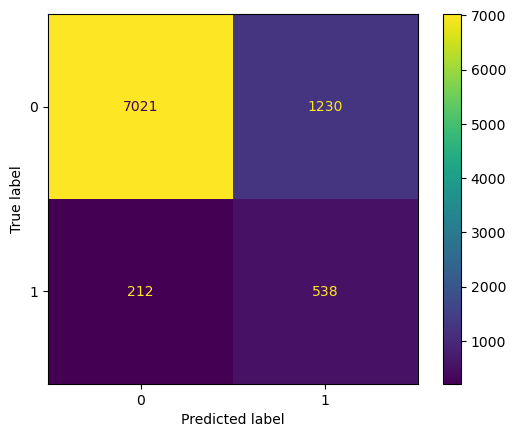

In [142]:
# Visualizing confusion matrix
ConfusionMatrixDisplay.from_estimator(xgb_best, X_test, y_test, cmap='viridis')
plt.show()

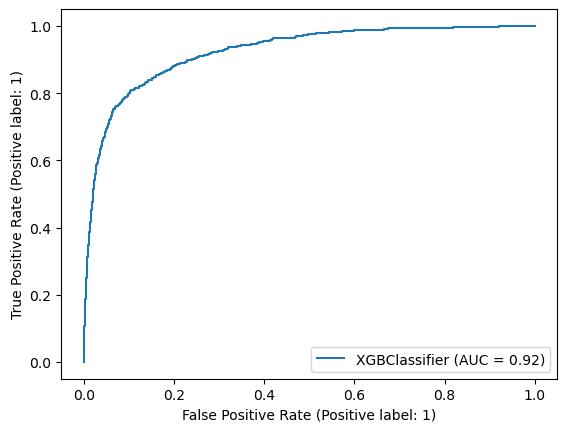

In [143]:
# Plotting the ROC_AUC curve
RocCurveDisplay.from_estimator(xgb_best, X_test_scale, y_test)
plt.show()

In [144]:
# checking various model's performance on test set on Churn=1.
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.097078,0.509333,0.163074,0.572497
1,DecisionTree,0.345986,0.741333,0.471786,0.858254
2,RandomForest,0.595294,0.674667,0.632500,0.927136
3,GradientBoosting,0.512652,0.729333,0.602091,0.919522
4,XGBoost,0.651026,0.592000,0.620112,0.930638


Inference:

- XGBoost is the best overall, with the highest ROC_AUC and strong balance of precision & recall.
- Random Forest performs slightly better in recall & F1-score, making it good for capturing positive cases.
- Gradient Boosting is close to Random Forest, but slightly weaker in F1-score.
- Decision Tree is decent, but not as effective as ensemble models.
- Logistic Regression performs poorly due to the complexity of the dataset.

### Feature importance and Model interpretation

In [145]:
# Defining the parameter grid
param_grid = { "n_estimators": [90, 110], "subsample": [0.5, 0.7, 1], "max_depth": [5, 7], "learning_rate": [0.2, 0.4]}

# Performing RandomizedSearchCV
xgb_clf_rcv = RandomizedSearchCV(XGBClassifier(random_state=100), param_distributions=param_grid,cv=5,scoring="f1_micro", 
    n_iter=3,n_jobs=-1)

xgb_clf_rcv.fit(X_train_scale, y_train_resample)

# Printing best parameters
print("Best Parameters:", xgb_clf_rcv.best_params_)

Best Parameters: {'subsample': 1, 'n_estimators': 90, 'max_depth': 7, 'learning_rate': 0.2}


In [146]:
# Training XGBoost with Best Parameters
xgb_best = XGBClassifier(**xgb_clf_rcv.best_params_, random_state=100, n_jobs=-1)
xgb_best.fit(X_train_scale, y_train_resample)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=90, n_jobs=-1,
              num_parallel_tree=None, random_state=100, ...)

In [147]:
# Making predictions
y_pred_xgb = xgb_best.predict(X_test_scale)
pred_prob_xgb = xgb_best.predict_proba(X_test_scale)[:, 1]  # Probability for class 1

In [148]:
# Evaluating Performance
df_xgb = calculate_peformance_testdata("XGBoost", y_test, y_pred_xgb, pred_prob_xgb)

XGBoost:
precision: 0.6394366197183099
recall: 0.6053333333333333
f1_score: 0.6219178082191781
roc_auc: 0.9261206318426048


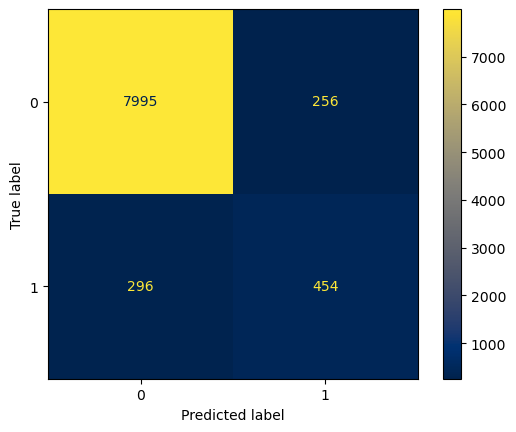

In [149]:
# Plotting Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb_best, X_test_scale, y_test, cmap='cividis')
plt.show()

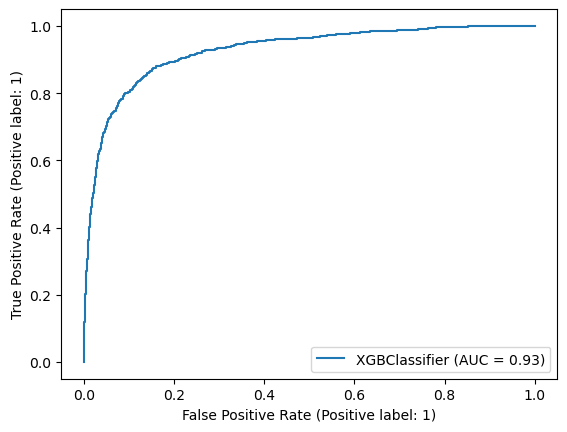

In [150]:
# Displaying ROC Curve
RocCurveDisplay.from_estimator(xgb_best, X_test_scale, y_test)
plt.show()

In [151]:
# Classification Report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      8251
           1       0.64      0.61      0.62       750

    accuracy                           0.94      9001
   macro avg       0.80      0.79      0.79      9001
weighted avg       0.94      0.94      0.94      9001



In [152]:
# Feature Importance Extraction
feature_importance_df = pd.DataFrame({
    "columns": X_train_scale.columns, 
    "feature_importance": xgb_best.feature_importances_})

In [153]:
# Selecting top 40 Features
fi_xgb = feature_importance_df.sort_values(by="feature_importance", ascending=False).head(40)

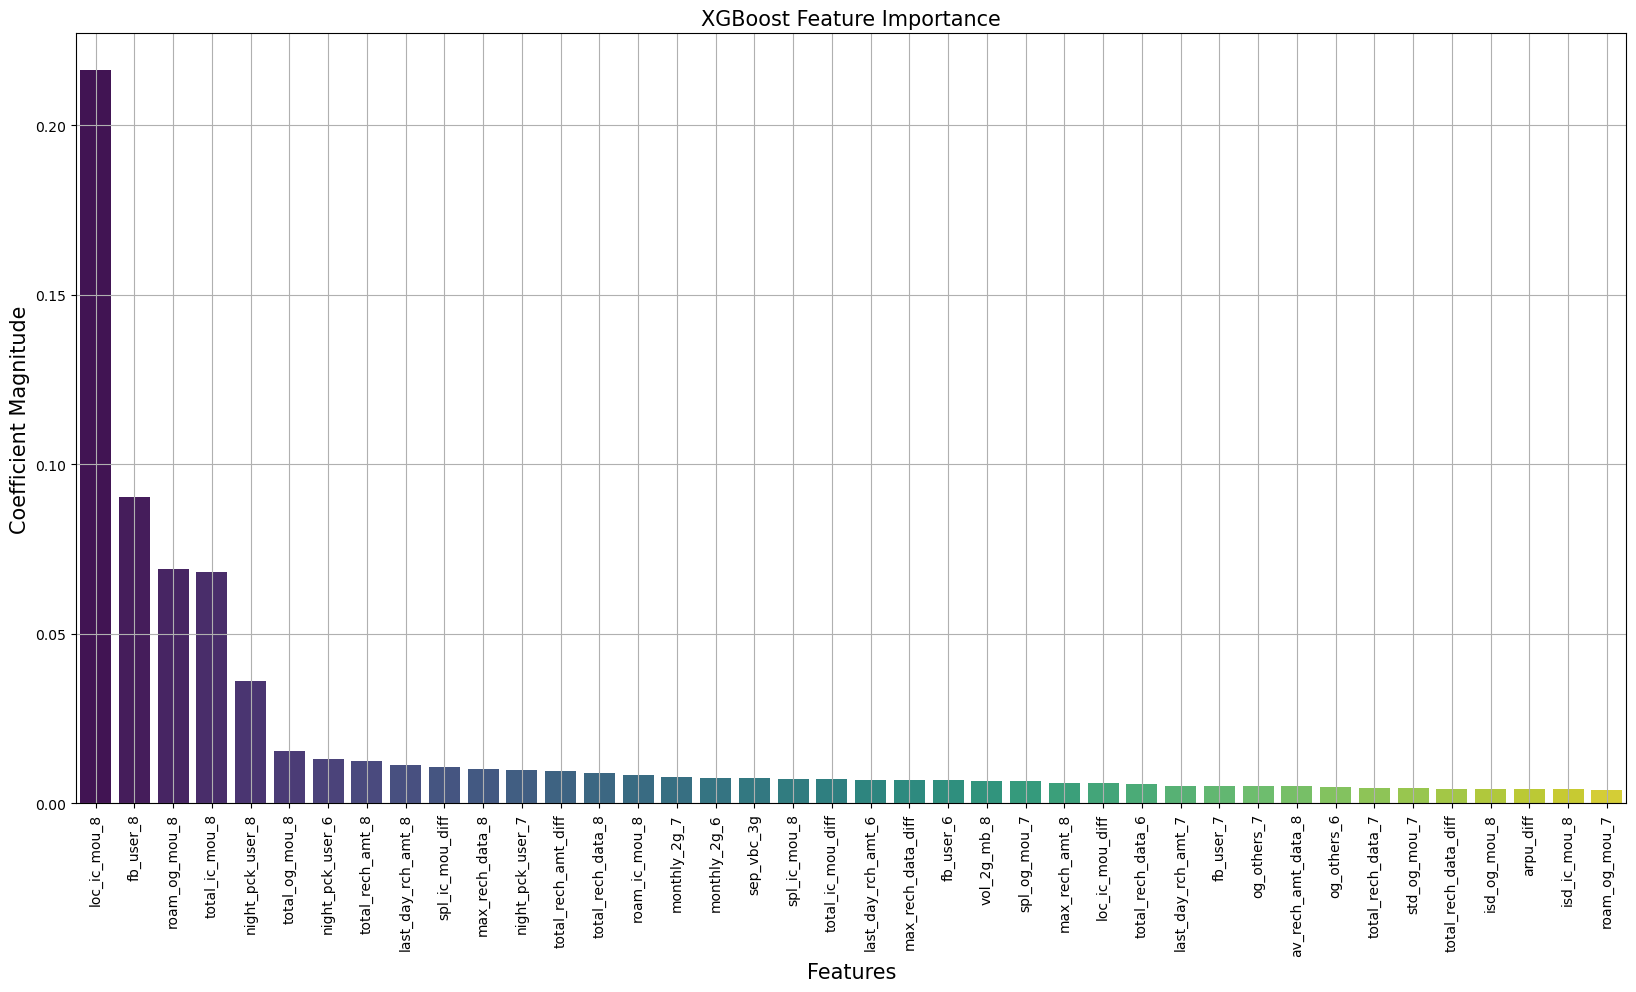

In [154]:
# Plotting Feature Importance for XGBoost
plt.figure(figsize=(20, 10))
sns.barplot(x="columns", y="feature_importance", data=fi_xgb, palette="viridis")
plt.title("XGBoost Feature Importance", size=15)
plt.xticks(rotation=90)
plt.ylabel("Coefficient Magnitude", size=15)
plt.xlabel("Features", size=15)
plt.grid(True)
plt.show()

In [155]:
# Creating Feature Importance DataFrame
feature_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": xgb.feature_importances_})

# Printing the top 10 most important features
print("Most Important Predictors of churn, in the order of importance are:")
print(feature_importance_df.sort_values(by="Importance", ascending=False).head(10).to_string(index=False))

Most Important Predictors of churn, in the order of importance are:
           Feature  Importance
      loc_ic_mou_8    0.203751
         fb_user_8    0.110181
     roam_og_mou_8    0.064581
    total_ic_mou_8    0.054210
  night_pck_user_8    0.048391
   max_rech_data_8    0.016761
    total_og_mou_8    0.016146
  total_rech_amt_8    0.013585
 total_rech_data_8    0.010920
last_day_rch_amt_8    0.010402


### Conclusion:

- The most important features are as shown in above graph (top 40 features)
- From this, we will select only the top 10 most important features for recommendation
1) Customers with a high volume of local incoming calls, (loc_ic_mou_8 = 0.203751), may be avoiding outgoing calls due to high costs. If competitors offer better call rates, these users are more likely to churn.
2) Heavy data users (fb_user_8 = 0.110181), are highly sensitive to data speed and pricing. If they experience slow internet or find a better data plan elsewhere, they are at a higher risk of leaving.
3) Customers who make frequent roaming outgoing calls (roam_og_mou_8 = 0.064581) may switch if roaming charges are high or if they find another provider with better roaming benefits.
4) A high volume of incoming calls (total_ic_mou_8 = 0.054210) suggests that users rely more on receiving calls rather than making them, possibly due to expensive outgoing call rates. These users may churn if they find better offers.
5) Customers subscribed to night data packs (night_pck_user_8 = 0.048391) are primarily data consumers. If the network performance is poor or night packs are not competitive, they are more likely to switch to another provider.
6) Customers who frequently recharge large amounts of data (max_rech_data_8 = 0.016761) expect fast and reliable internet. If they face slow speeds or expensive data plans, they might churn.
7) High outgoing call users (total_og_mou_8 = 0.016146) are at risk if they find better voice plans elsewhere. Cost-conscious customers may migrate to competitors offering unlimited calling.
8) Customers who recharge with higher amounts (total_rech_amt_8 = 0.013585) are valuable but also expect premium services. If they perceive a lack of value, they may explore other options.
9) Heavy data users (total_rech_data_8 = 0.010920) are more likely to churn if data caps, slow speeds, or expensive pricing become a problem.
10) Customers who recharge at the last moment (last_day_rch_amt_8 = 0.010402) might be hesitant to commit and could be considering other network options before deciding to continue.

##### Key takeaways:

- High data and call users are at greater risk of churn if they find better plans or experience poor network quality.
- Roaming and night pack users are price-sensitive and may leave if they perceive their current plans as expensive or restrictive.
- High-recharge customers expect premium services and are more likely to churn if they feel they are not getting good value for their money.
- Facebook users and heavy data consumers are a crucial segment to retain by offering better data plans and strong network performance.

##### Recommendations:

Based on the strongest indicators of churn, the following actions are recommended:

- Target users with significantly lower local incoming call usage: 

Customers who have 20.3% lower local incoming call minutes compared to the average are the most likely to churn. 
Implement engagement campaigns or discounted call plans for these users to retain them.

- Focus on Facebook users: 

Customers who actively use Facebook (11%) are at a higher risk of churning. 
Offering social media data bundles or exclusive content could help retain this segment.

- Identify roaming users with lower outgoing call minutes: 

Users with 6.5% lower roaming outgoing call minutes are likely to churn. 
Consider offering travel-friendly roaming packages to keep these users engaged.

- Monitor total incoming call usage: 

A 5.4% drop in total incoming call minutes is linked to higher churn rates. 
Encouraging inbound call activity through better call incentives or loyalty programs can help retain these users.

- Prioritize night pack users with declining engagement: 

Customers subscribed to night packs (4.8%) but showing lower usage should be targeted with personalized retention offers 
or bonuses to maintain engagement.